<a href="https://colab.research.google.com/github/mhankazis/PCVK_Ganjil_2024/blob/main/Week3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 3 - Malik Abdul Azis**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Practicum Task**

Mengubah tingkat kecerahan citra
---------------------------------
Masukkan nilai kecerahan: 50


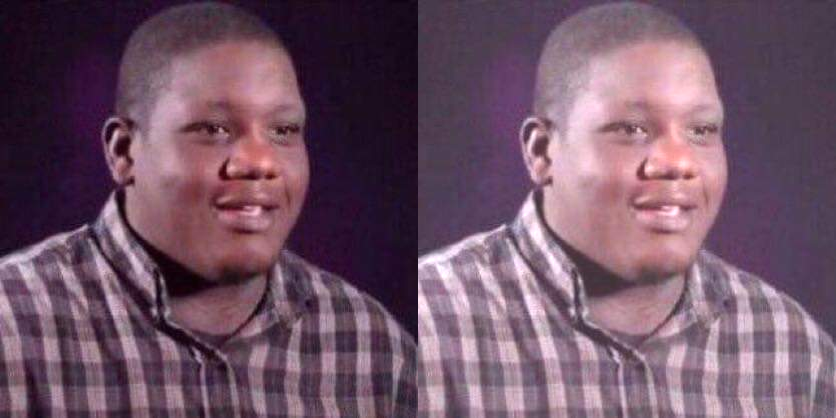

In [2]:
from google.colab.patches import cv2_imshow
import cv2 as cv
import numpy as np
print('Mengubah tingkat kecerahan citra')
print('---------------------------------')

try:
  brightness = int(input('Masukkan nilai kecerahan: '))
except ValueError:
  print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/si ganteng.jpg')
brightness_image = np.zeros(original.shape, original.dtype)

#Access per-pixel
for y in range(original.shape[0]):
  for x in range(original.shape[1]):
    for c in range(original.shape[2]):
      brightness_image [y,x,c] = np.clip(original [y,x,c] + brightness, 0, 255)

#Simple way without loop
#brightness_image = cv.convertScaleAbs (original, beta-brightness)

final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

## **Practicum 1**

Mengimplementasikan inverse citra
---------------------------------


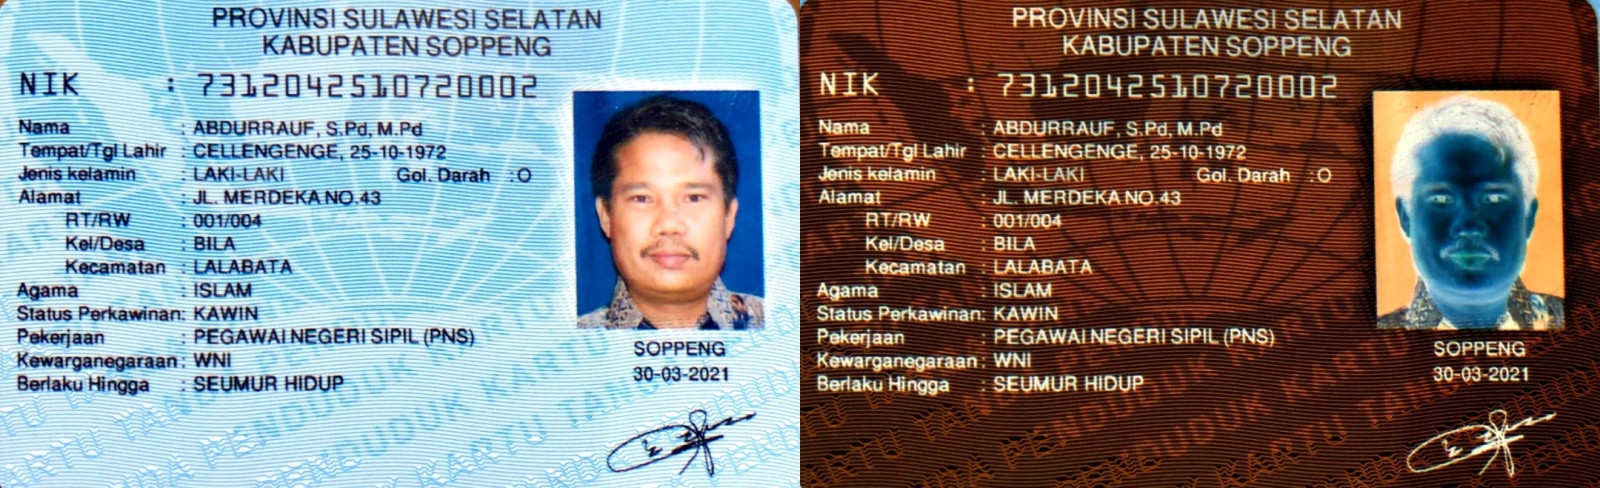

In [9]:
print('Mengimplementasikan inverse citra')
print('---------------------------------')

# Read the image
original = cv.imread('/content/drive/MyDrive/ktp.jpeg')

# Create an inverted image
inverted_image = 255 - original

# Concatenate original and inverted images horizontally
final_frame = cv.hconcat((original, inverted_image))

# Display the result
cv2_imshow(final_frame)

## **Practicum 2**

Mengubah kontras dan tingkat kecerahan citra
-------------------------------------------
Masukkan tingkat kecerahan [-255 - 255]: 50
Masukkan kontras [1.0 - 3.0]: 50


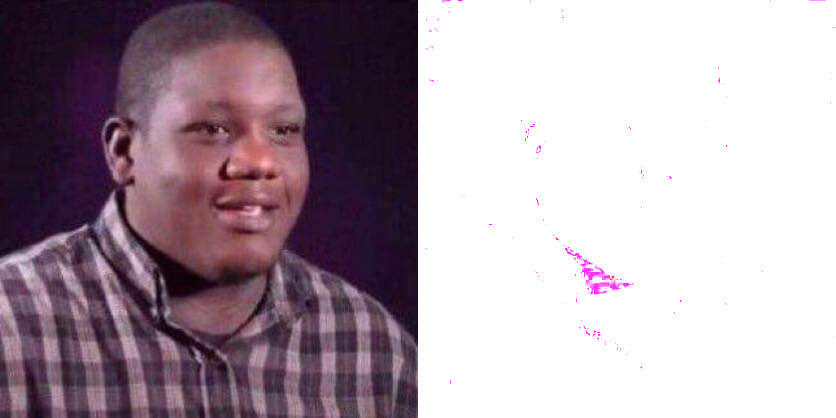

In [5]:
print('Mengubah kontras dan tingkat kecerahan citra')
print('-------------------------------------------')

# Read the image
original = cv.imread('/content/drive/MyDrive/si ganteng.jpg')

# Get user input for brightness and contrast
brightness = int(input('Masukkan tingkat kecerahan [-255 - 255]: '))
contrast = float(input('Masukkan kontras [1.0 - 3.0]: '))

# Adjust brightness and contrast
adjusted = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

# Concatenate original and adjusted images horizontally
final_frame = cv.hconcat((original, adjusted))

# Display the result
cv2_imshow(final_frame)

## **Practicum 3**

Mengubah tingkat kecerahan citra dengan Transformasi Log
------------------------------------------------------
Masukkan nilai kecerahan: 50


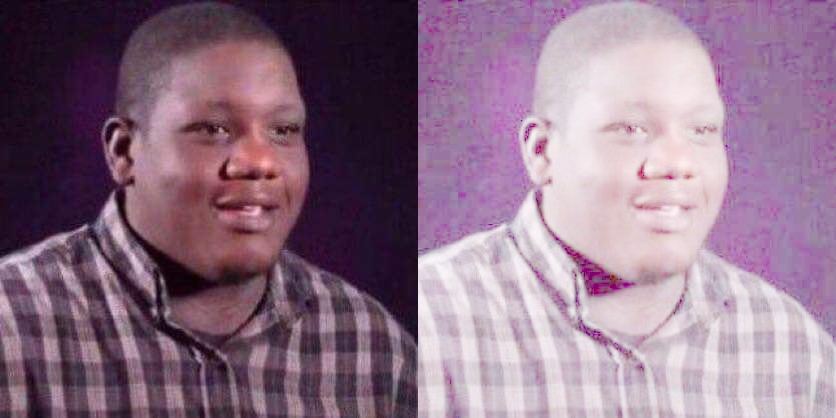

In [6]:
print('Mengubah tingkat kecerahan citra dengan Transformasi Log')
print('------------------------------------------------------')

# Read the image
original = cv.imread('/content/drive/MyDrive/si ganteng.jpg')

# Get user input for brightness
c = float(input('Masukkan nilai kecerahan: '))

# Apply logarithmic transformation
def logarithmic_transform(image, c):
    # Convert to float to avoid overflow
    float_image = image.astype(float)
    # Apply logarithmic transform
    log_image = c * np.log(1 + float_image)
    # Normalize to 0-255 range
    normalized = cv.normalize(log_image, None, 0, 255, cv.NORM_MINMAX)
    # Convert back to uint8
    return normalized.astype(np.uint8)

# Apply transformation
adjusted = logarithmic_transform(original, c)

# Concatenate original and adjusted images horizontally
final_frame = cv.hconcat((original, adjusted))

# Display the result
cv2_imshow(final_frame)

## **Practicum 4**

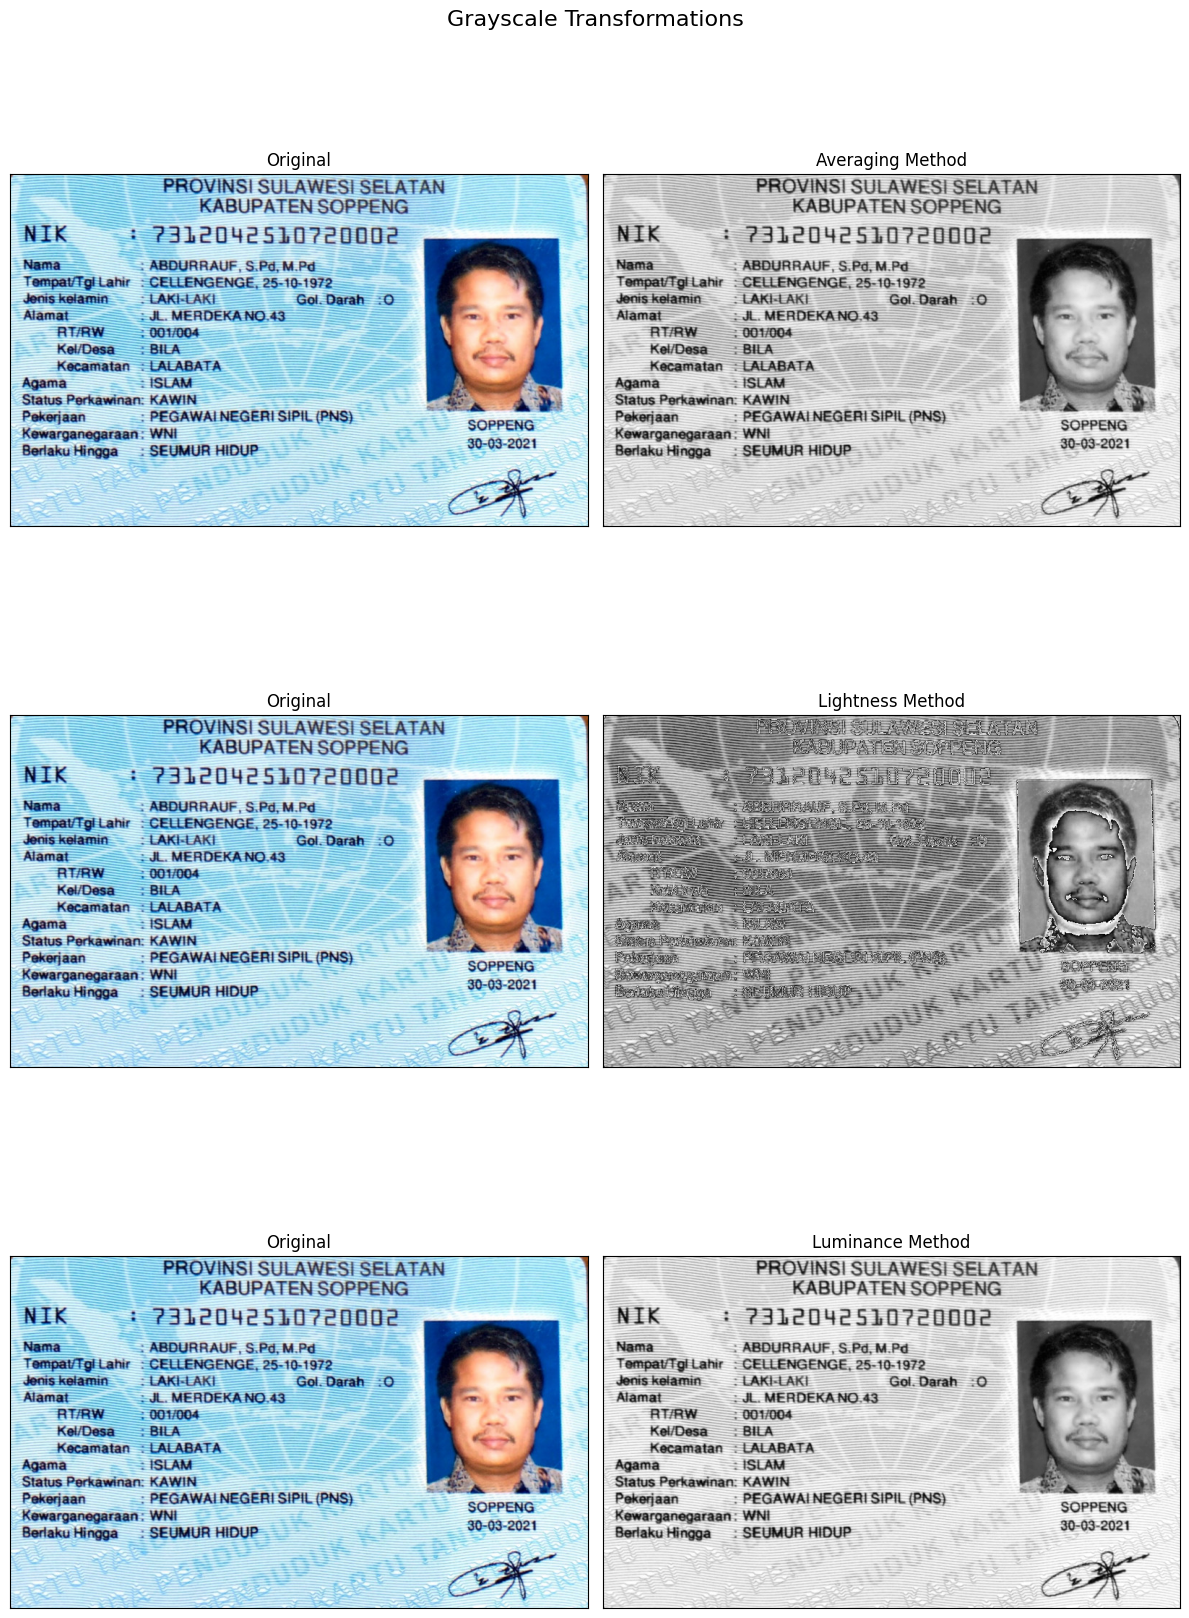

In [10]:
import cv2
import matplotlib.pyplot as plt

def averaging_method(image):
    return np.mean(image, axis=2).astype(np.uint8)

def lightness_method(image):
    return ((np.max(image, axis=2) + np.min(image, axis=2)) / 2).astype(np.uint8)

def luminance_method(image):
    return (0.2126 * image[:,:,2] + 0.7152 * image[:,:,1] + 0.0722 * image[:,:,0]).astype(np.uint8)

# Read the image
image = cv2.imread('/content/drive/MyDrive/ktp.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Apply grayscale transformations
avg_gray = averaging_method(image)
lightness_gray = lightness_method(image)
luminance_gray = luminance_method(image)

# Create subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 18))
fig.suptitle('Grayscale Transformations', fontsize=16)

# Display original and transformed images
axs[0, 0].imshow(image)
axs[0, 0].set_title('Original')
axs[0, 1].imshow(avg_gray, cmap='gray')
axs[0, 1].set_title('Averaging Method')

axs[1, 0].imshow(image)
axs[1, 0].set_title('Original')
axs[1, 1].imshow(lightness_gray, cmap='gray')
axs[1, 1].set_title('Lightness Method')

axs[2, 0].imshow(image)
axs[2, 0].set_title('Original')
axs[2, 1].imshow(luminance_gray, cmap='gray')
axs[2, 1].set_title('Luminance Method')

# Remove axis ticks
for ax in axs.flat:
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## **Practicum 5**

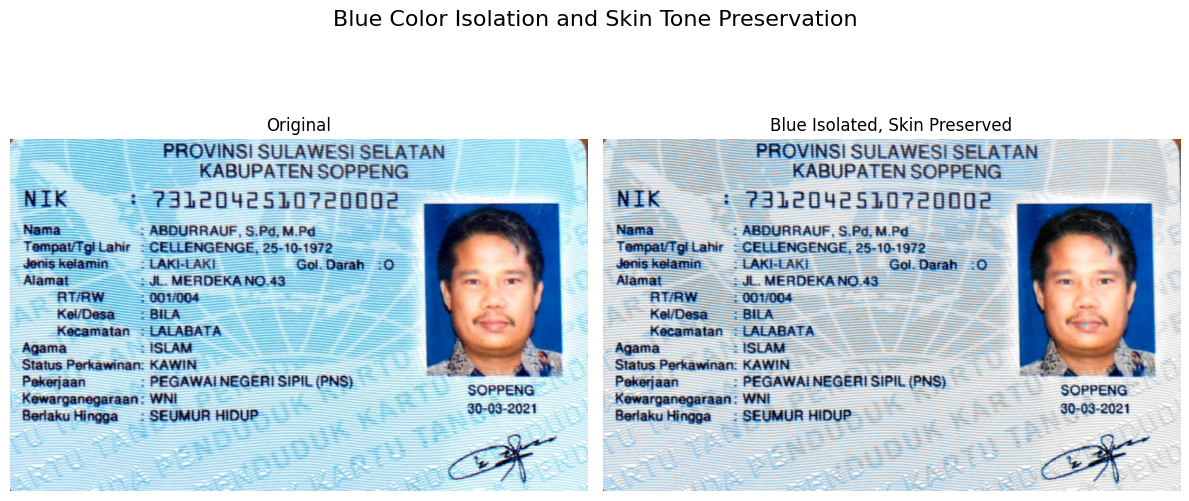

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def isolate_blue_and_preserve_skin(image):

    if image is None:
        raise ValueError("Image not loaded. Please check the file path.")

    # Convert to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Define range for blue color in HSV
    lower_blue = np.array([100, 50, 50])
    upper_blue = np.array([130, 255, 255])

    # Create a mask for blue color
    blue_mask = cv2.inRange(hsv, lower_blue, upper_blue)

    # Define range for skin color in HSV
    lower_skin = np.array([0, 20, 70])
    upper_skin = np.array([20, 255, 255])

    # Create a mask for skin color
    skin_mask = cv2.inRange(hsv, lower_skin, upper_skin)

    # Combine blue and skin masks
    combined_mask = cv2.bitwise_or(blue_mask, skin_mask)

    # Convert the original image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create a 3-channel grayscale image
    gray_3channel = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)

    # Use the combined mask to keep blue and skin color areas, while converting the rest to grayscale
    result = np.where(combined_mask[:,:,None].astype(bool), image, gray_3channel)

    return result

# Read the image
image = cv2.imread('/content/drive/MyDrive/ktp.jpeg')

# Apply the transformation
result = isolate_blue_and_preserve_skin(image)

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
fig.suptitle('Blue Color Isolation and Skin Tone Preservation', fontsize=16)

# Display original and transformed images
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Original')
ax1.axis('off')

ax2.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
ax2.set_title('Blue Isolated, Skin Preserved')
ax2.axis('off')

plt.tight_layout()
plt.show()